Model Training
1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [10]:
pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.3 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.4/9.3 MB 3.5 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.3 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.3 MB 4.4 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.3 MB 4.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.1/9.3 MB 4.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.4/9.3 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
    --------------------------------------- 1.0/42.2 MB 5.0 MB/s eta 0:00:09
   - -------------------

In [11]:
import sklearn
print(sklearn.__version__)



1.3.2


In [13]:
pip install catboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 10.1 MB/s eta 0:00:11
    --------------------------------------- 2.1/102.5 MB 4.9 MB/s eta 0:00:21
   - -------------------------------------- 3.1/102.5 MB 6.1 MB/s eta 0:00:17
   - -------------------------------------- 4.2/102.5 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 4.5/102.5 MB 4.4 MB/s eta 0:00:23
   -- ------------------------------------- 6.3/102.5 MB 4.9 MB/s eta 0:00:20
   -- ------------------------------------- 6.6/102.5 MB 4.4 MB/s eta 0:00:22
   --- ------------------------------------ 8.1/102.5 MB 4.7 MB/s eta 0:00:20
   ---- ----------------------------------- 10.5/102.5 MB 5.4 MB/s eta 0:00:18
   ---- ----------------------------------- 11.5/102.5 MB 5.6 MB/s eta 0:00:17
   ---- ----------------------------------- 11.5/102.5 MB 5.6 MB/s eta 0:00:17
   ---- ----------------------------------- 12.1/102.5 MB 4.7 MB/s 

In [15]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 1.8/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 2.6/124.9 MB 4.2 MB/s eta 0:00:30
   - -------------------------------------- 3.4/124.9 MB 4.3 MB/s eta 0:00:29
   - -------------------------------------- 3.9/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 4.7/124.9 MB 3.8 MB/s eta 0:00:33
   - -------------------------------------- 5.8/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 6.8/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.6/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 8.4/124.9 MB 4.0 MB/s eta 0:00:30
   --- ------------------------------------ 9.4/124.9 MB 4.1 MB/s eta 0:00:29
   --- ------------------------------------ 10.7/124.9 MB 4.2 MB/s eta 

In [16]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [18]:
df = pd.read_csv('data\cybersecurity_intrusion_data.csv')


Show Top 5 Records

In [19]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


Preparing X and Y variables

In [20]:
X = df.drop(columns=['attack_detected'],axis=1)

In [21]:
X.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0


In [22]:
print("Categories in 'protocol_type' variable:     ",end=" " )
print(df['protocol_type'].unique())

print("Categories in 'encryption_used' variable:  ",end=" ")
print(df['encryption_used'].unique())

print("Categories in'browser_type' variable:",end=" " )
print(df['browser_type'].unique())

Categories in 'protocol_type' variable:      ['TCP' 'UDP' 'ICMP']
Categories in 'encryption_used' variable:   ['DES' 'AES' nan]
Categories in'browser_type' variable: ['Edge' 'Firefox' 'Chrome' 'Unknown' 'Safari']


In [23]:
y = df['attack_detected']

In [24]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [26]:

X.shape

(9537, 9554)

In [27]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7629, 9554), (1908, 9554))

Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4216
- Mean Absolute Error: 0.3648
- R2 Score: 0.2830


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4970
- Mean Absolute Error: 0.4940
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4979
- Mean Absolute Error: 0.4950
- R2 Score: -0.0003


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2118
- Mean Absolute Error: 0.1840
- R2 Score: 0.8184
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4216
- Mean Absolute Error: 0.3649
- R2 Score: 0.2830


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3216
- Mean Absolute Error: 0.2223
- R2 Score: 0.5814
----------------------

Results

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.642532
7,CatBoosting Regressor,0.639172
5,Random Forest Regressor,0.588730
8,AdaBoost Regressor,0.570053
4,Decision Tree,0.551741
3,K-Neighbors Regressor,0.378443
0,Linear Regression,0.283050
2,Ridge,0.283045
1,Lasso,-0.000290


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Create and fit the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the XGBRegressor model is %.2f%%" % score)


Accuracy of the XGBRegressor model is 64.25%


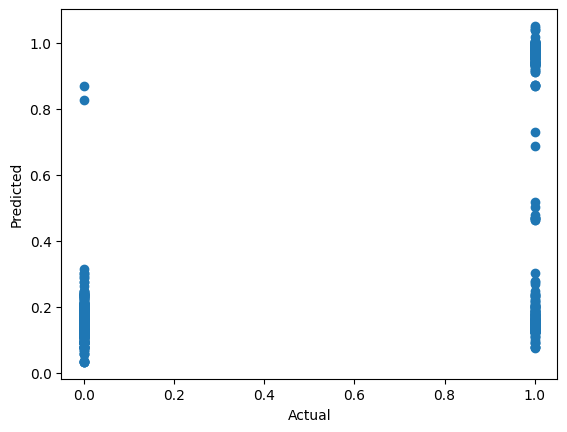

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

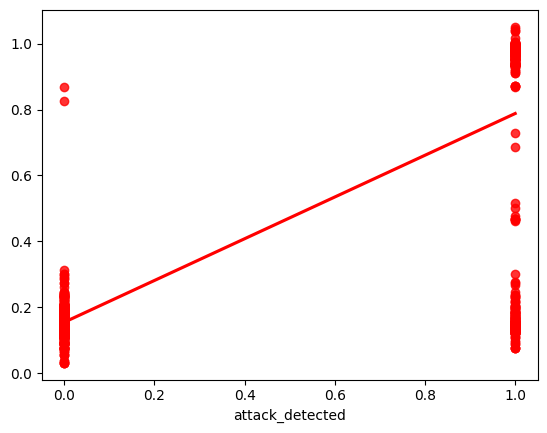

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1162,0,0.131475,-0.131475
2299,0,0.190406,-0.190406
1149,1,0.980835,0.019165
3945,1,0.156674,0.843326
4883,0,0.155862,-0.155862
...,...,...,...
7661,0,0.141176,-0.141176
5665,1,0.985073,0.014927
4174,0,0.156258,-0.156258
5003,0,0.134571,-0.134571
